# Softmax Lab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files

In [3]:
!cp /content/drive/MyDrive/Datasets/lab_utils_common.py /content

In [4]:
!cp /content/drive/MyDrive/Datasets/lab_utils_softmax.py /content

In [17]:
from google.colab import output
output.disable_custom_widget_manager()

In [10]:
pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00


In [5]:
!cp /content/drive/MyDrive/Datasets/deeplearning.mplstyle /content

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Softmax Function
In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}


Which shows the output is a vector of probabilities. The first entry is the probability the input is the first category given the input $\mathbf{x}$ and parameters $\mathbf{w}$ and $\mathbf{b}$.

In [12]:
def my_softmax(z):
    ez = np.exp(z)#element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

**Below, we can vary the values of the `z` inputs using the sliders.**

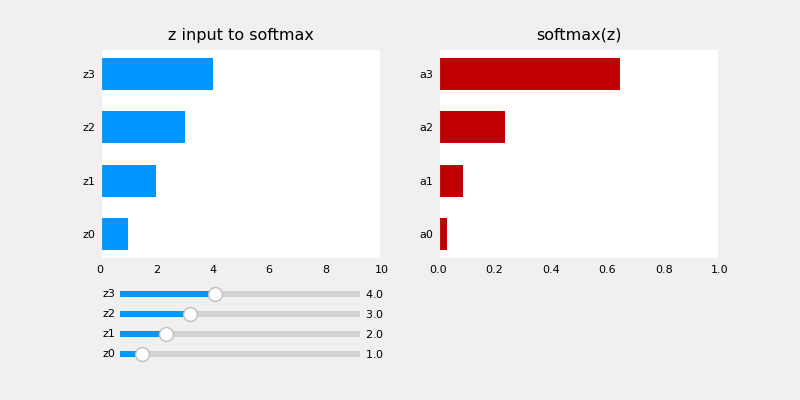

In [18]:
plt.close("all")
plt_softmax(my_softmax)

## Cost

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** Here Loss is for one example while Cost covers all examples.


Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise.
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}$$

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


## Implementing the Softmax, Cross-Entropy Loss in Tensorflow

In [19]:
# making  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

### The *Obvious* organization

The model below is implemented with the softmax as an activation in the final Dense layer.
The loss function is separately specified in the `compile` directive.

The loss function is `SparseCategoricalCrossentropy`. This loss is described in (3) above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities.

In [20]:
model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')#softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)


Epoch 1/10
63/63 [==============================] - 2s 3ms/step - loss: 1.0936
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.5372
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2437
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0468
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0435


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [21]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 2ms/step
[[3.63e-03 3.01e-03 9.72e-01 2.10e-02]
 [9.94e-01 5.64e-03 4.94e-04 2.86e-05]]
largest value 0.99999964 smallest value 2.5204892e-12


### Preferred Model

In [22]:
preferred_model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')# Note softmax but not linear
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)


Epoch 1/10
63/63 [==============================] - 1s 3ms/step - loss: 1.1210
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.6130
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3496
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1911
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1143
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0789
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0616
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0413


### Handling Outputs

In the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability.

In [23]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[-2.14 -2.74  3.28 -0.95]
 [ 2.89 -1.8  -6.24 -7.88]]
largest value 9.843831 smallest value -12.912748


The output predictions are not probabilities!
If the desired output are probabilities, the output should be be processed by a [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax).

In [24]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[4.33e-03 2.38e-03 9.79e-01 1.42e-02]
 [9.91e-01 9.08e-03 1.07e-04 2.09e-05]]
largest value 0.99999917 smallest value 7.1187223e-10


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [25]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.14 -2.74  3.28 -0.95], category: 2
[ 2.89 -1.8  -6.24 -7.88], category: 0
[ 2.07 -0.87 -4.63 -6.29], category: 0
[-0.27  3.68 -0.57 -4.19], category: 1
[-1.02 -5.35  4.1  -3.86], category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9.
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be `[0,0,1,0,0,0,0,0,0,0]`.
